[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/juansensio/elcursodeia-code/blob/master/dl/03_fundamentos.ipynb)

# El Perceptrón

Existen varias tareas que podemos llevar a cabo con un `Perceptrón`. La primera que se propuso es la `regresión lineal`. En este tipo de tarea, como en cualquier tarea de regresión, queremos obtener un modelo que se ajuste de la mejor forma posible a un conjunto de datos determinado. En el caso de la regresión lineal, este modelo será una línea recta y el `Perceptrón`, utilizando una función de activación lineal, $f(x) = x$, es de hecho capaz de llevar a cabo esta tarea.

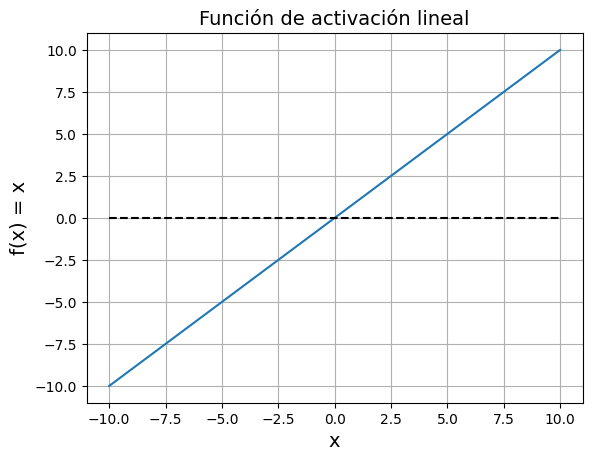

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-10, 10)
y = x

plt.plot(x, y)
plt.grid(True)
plt.xlabel('x', fontsize=14)
plt.ylabel('f(x) = x', fontsize=14)
plt.title('Función de activación lineal', fontsize=14)
plt.plot(x, np.zeros(len(x)), '--k')
plt.show()

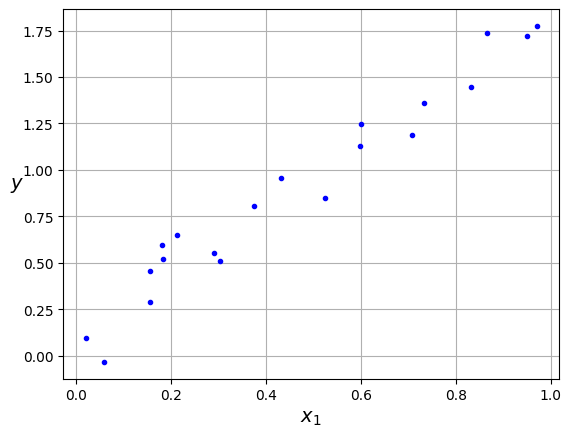

In [2]:
np.random.seed(42)

x = np.random.rand(20)
y = 2*x + (np.random.rand(20)-0.5)*0.5

plt.plot(x, y, "b.")
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.grid(True)
plt.show()

El objetivo es que el `Perceptrón`, al recibir cada uno de estos valores, nos dé como salida un valor lo más cercano posible a $y$. En este caso, al tener una sola característica por elemento, nuestro `Perceptrón` sigue la siguiente expresión:

$$
 \hat{y} = \mathbf{w} \cdot \mathbf{x} = w_0 + w_1 x_1
$$

En el caso en que $w_0 = 0$ y $w_1 = 2$, $\hat{y} = 2 x$

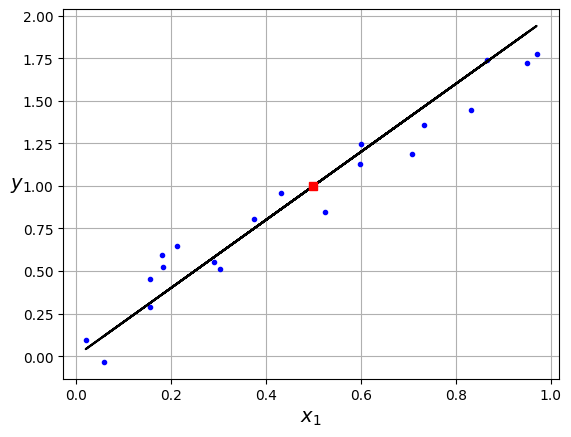

In [3]:
plt.plot(x, y, "b.")
plt.plot(x, 2*x, 'k')
plt.plot(0.5, 2*0.5, 'sr')
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.grid(True)
plt.show()

Sin embargo, aquí hemos hecho algo de trampa... En este ejemplo sabemos que los pesos de nuestro modelo son $w_0 = 0$ y $w_1 = 2$, ya que son los mismos utilizados para generar los datos. Nuestro objetivo será el de encontrar estos valores, y para ello utilizamos el famoso algoritmo de `descenso por gradiente`.

In [44]:
from matplotlib import animation, rc
rc('animation', html='html5')

def init_fig(x, t, ws, cost_ws):
    """Initialise figure"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
    ax2.plot(x, t, 'bo', label='$y$')
    ax2.set_xlim([0, 1])
    ax2.set_ylim([0, 2])
    ax2.set_xlabel('$x$', fontsize=15)
    # ax2.set_ylabel('$      \hat{y}$', fontsize=15, rotation=0)
    ax2.yaxis.set_label_position('right')
    # ax2.set_title('Labelled data & model output', fontsize=18)
    line2, = ax2.plot([], [], 'k-', label='$\hat{y}=x*w_1$')
    ax2.legend(loc=2)
    # Cost function plot
    ax1.plot(ws, cost_ws, 'r-', label='coste')
    ax1.set_ylim([-2, 8])
    ax1.set_xlim([1, 3])
    ax1.set_xlabel('$w_1$', fontsize=15)
    ax1.set_ylabel('$\sum |\hat{y}-y|^2$', fontsize=15)
    cost_text = ax1.set_title('step {}'.format(0), fontsize=18)
    line1, = ax1.plot([], [], 'k:', label='derivada')
    pc_dots, = ax1.plot([], [], 'ko')
    ax1.legend(loc=2)
    return fig, ax1, ax2, line1, line2, pc_dots, cost_text

def get_anim(fig, ax1, ax2, line1, line2, pc_dots, cost_text, weights):
    """Return animation function."""
    xs = np.linspace(0, 4, num=100)  # weight values
    def anim(i):
        """Animate step i"""
        if i == 0:
            return [line1, line2, pc_dots, cost_text]
        (w, dw, cost) = weights[i-1]
        cost_text.set_text('{:.3f} (step {})'.format(cost, i))
        ws, _, cs = zip(*weights[0:i])
        pc_dots.set_xdata(ws)
        pc_dots.set_ydata(cs)
        abline_values = [dw * (x-w) + cost for x in xs]
        line1.set_xdata(xs)
        line1.set_ydata(abline_values)
        # Plot fit
        # plot the fitted line
        line2.set_xdata([0, 1])
        line2.set_ydata([0*w, 1*w])
        ax2.legend(loc=2)
        return [line1, line2, pc_dots, cost_text]
    return anim

def gradient(w, x, t): 
    return np.sum(2.* x * (x*w - t))

def cost(y, t): 
  return ((t - y)**2).sum()

ws = np.linspace(0, 4, num=100)  
cost_ws = np.vectorize(lambda w: cost(x*w, y))(ws)  
fig, ax1, ax2, line1, line2, pc_dots, cost_text = init_fig(x, y, ws, cost_ws)
plt.close(fig)  

In [45]:
w = 1.
lr = 0.001
epochs = 20
weights = [(w, gradient(w, x, y), cost(x*w, y))]
for i in range(epochs):
    dw = gradient(w, x, y)
    w = w - lr*dw
    weights.append((w, dw, cost(x*w, y)))

animate = get_anim(fig, ax1, ax2, line1, line2, pc_dots, cost_text, weights)
anim = animation.FuncAnimation(fig, animate, frames=len(weights)+1, interval=200, blit=True)
anim

Stochastic Gradient Descent

In [46]:
w = 1
lr = 0.1
epochs = 2
weights = [(w, gradient(w, x, y), cost(x*w, y))]
N = x.shape[0]
ixs = np.arange(N)
for i in range(epochs):
    np.random.shuffle(ixs)
    for ix in ixs:
      _x, _y = x[ix], y[ix]
      dw = gradient(w, _x, _y)
      w = w - lr*dw
      weights.append((w, dw, cost(_x*w, _y)))

fig, ax1, ax2, line1, line2, pc_dots, cost_text = init_fig(x, y, ws, cost_ws)
plt.close(fig)  
animate = get_anim(fig, ax1, ax2, line1, line2, pc_dots, cost_text, weights)
anim = animation.FuncAnimation(fig, animate, frames=len(weights)+1, interval=200, blit=True)
anim

Mini-Batch Gradient Descent

In [47]:
w = 1
lr = 0.01
epochs = 10
batch_size = 10
weights = [(w, gradient(w, x, y), cost(x*w, y))]
ixs = np.arange(x.shape[0])
batches = x.shape[0] // batch_size
for i in range(epochs):
    np.random.shuffle(ixs)
    for i in range(batches):
      _x, _y = x[ixs[i*batch_size:(i+1)*batch_size]], y[ixs[i*batch_size:(i+1)*batch_size]]
      dw = gradient(w, _x, _y)
      w = w - lr*dw
      weights.append((w, dw, cost(_x*w, _y)))
    
fig, ax1, ax2, line1, line2, pc_dots, cost_text = init_fig(x, y, ws, cost_ws)
plt.close(fig)
animate = get_anim(fig, ax1, ax2, line1, line2, pc_dots, cost_text, weights)
anim = animation.FuncAnimation(fig, animate, frames=len(weights)+1, interval=200, blit=True)
anim

# Clasificación

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# funciones de pérdida

def mse(y, y_hat):
		return np.mean((y_hat - y)**2)

def bce(y, y_hat):
		return - np.mean(y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat))

# funciones de activación

def linear(x):
		return x

def step(x):
		return x > 0

def sigmoid(x):
	return 1 / (1 + np.exp(-x))

# Perceptrón

class Perceptron():
	def __init__(self, size, activation, loss):
		self.w = np.random.randn(size)
		self.ws = []
		self.activation = activation
		self.loss = loss

	def __call__(self, w, x):
		return self.activation(np.dot(x, w))

	def fit(self, x, y, epochs, lr):
		x = np.c_[np.ones(len(x)), x]
		for epoch in range(epochs):
				# Batch Gradient Descent
				y_hat = self(self.w, x)
				# función de pérdida
				l = self.loss(y, y_hat)
				# derivadas
				dldh = (y_hat - y)
				dhdw = x
				dldw = np.dot(dldh, dhdw)
				# actualizar pesos
				self.w = self.w - lr*dldw
				# guardar pesos para animación
				self.ws.append(self.w.copy())

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(int) # clsificación binaria

X.shape, y.shape

((150, 2), (150,))

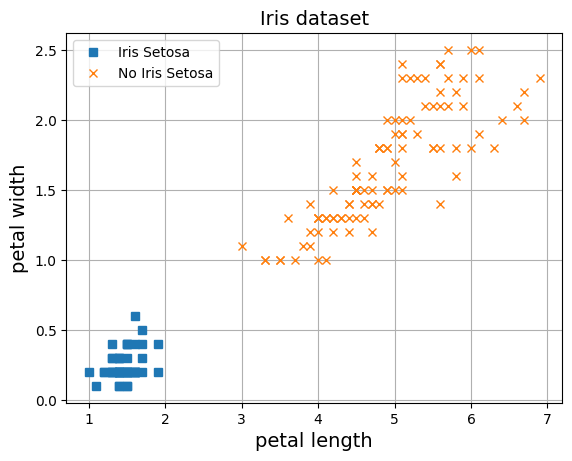

In [4]:
plt.plot(X[y==1, 0], X[y==1, 1], 's', label="Iris Setosa")
plt.plot(X[y==0, 0], X[y==0, 1], 'x', label="No Iris Setosa")
plt.grid()
plt.legend()
plt.xlabel('petal length', fontsize=14)
plt.ylabel('petal width', fontsize=14)
plt.title("Iris dataset", fontsize=14)
plt.show()

In [5]:
np.random.seed(42)

perceptron = Perceptron(3, sigmoid, bce)
epochs, lr = 20, 0.01
perceptron.fit(X, y, epochs, lr)

In [7]:
from matplotlib import animation, rc
rc('animation', html='html5')

def plot(epoch, w):
    ax.clear()
    tit = ax.set_title(f"Epoch {epoch+1}", fontsize=14)
    axes = [0, 5, 0, 2]
    x0, x1 = np.meshgrid(
            np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
            np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
        )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    X_new = np.c_[np.ones(len(X_new)), X_new]
    y_predict = perceptron(w, X_new)
    zz = y_predict.reshape(x0.shape)

    ax.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
    ax.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

    ax.contourf(x0, x1, zz, cmap=custom_cmap)
    ax.set_xlabel("Petal length", fontsize=14)
    ax.set_ylabel("Petal width", fontsize=14)
    ax.legend(loc="lower right", fontsize=14)
    ax.axis(axes)
    plt.close()
    return [tit]

def get_anim(fig, ax, ws):
    def anim(i):
        return plot(i, ws[i])
    return anim

fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111, autoscale_on=False)
animate = get_anim(fig, ax, perceptron.ws)
anim = animation.FuncAnimation(fig, animate, frames=len(perceptron.ws), interval=100, blit=True)
anim